# misura della costante di torsione

In [2]:
# import dati
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'massa_teta_C.csv'

fr = pd.read_csv(FILE)  # fileread
m = np.array(fr["mg"]) * 0.000001 # kg
teta1 = np.array(fr["teta1"])
teta2 = np.array(fr["teta2"])
teta3 = np.array(fr["teta3"])
teta4 = np.array(fr["teta4"])
teta5 = np.array(fr["teta5"])

teta = np.array([np.round(np.average([teta1[i],teta2[i],teta3[i],teta4[i],teta5[i]]),0) for i in range(0,len(teta1))],dtype=np.float64)
sigma_teta = np.array([np.round(np.std([teta1[i],teta2[i],teta3[i],teta4[i],teta5[i]])/np.sqrt(5),2) for i in range(0,len(teta1))],dtype=np.float64) # sigma media

teta = teta * np.pi / 180 # rad
sigma_teta = sigma_teta * np.pi / 180

F = m * 9.81

### verifica $\theta \propto F$

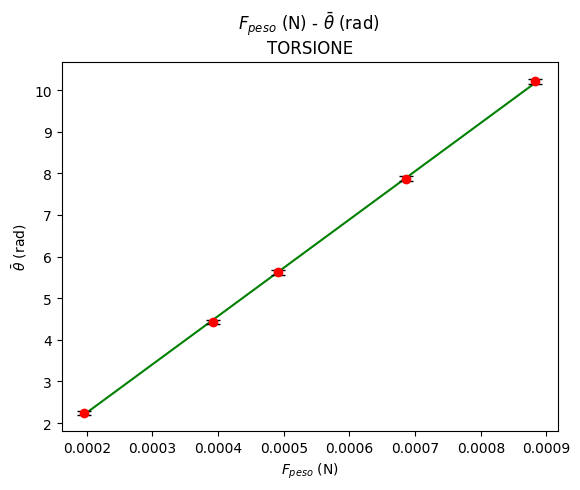


linearità A + BX
    
A: -0.0701717964183941 
B: 11604.576314703616
sigmaA: 0.05092522674554535
sigmaB: 87.74653686081516

sigmaY: [0.04841721 0.05363485 0.05479984 0.06224648 0.06797456]
chiquadro ridotto: 0.0005628187084672629
df: 3
    



In [7]:
import matplotlib.pyplot as plt
from interpolazione3 import RettaInterpolata

r = RettaInterpolata(F,teta,sigma_teta)

plt.title("$F_{peso}$ (N) - $\\bar{\\theta}$ (rad) \nTORSIONE")
plt.plot(r.x_best, r.y_best, color="green")
plt.errorbar(F,teta,fmt='o',yerr=r.sigmaY, ecolor='black', capsize=5, color="red")
plt.xlabel("$F_{peso}$ (N)")
plt.ylabel("$\\bar{\\theta}$ (rad)")
plt.show()

print(r)

## misura $K_{torcente}$

$F = K_{tor}\theta \Rightarrow \theta = \frac{F}{K_{tor}} \Rightarrow B = \frac{1}{K_{tor}}$

UDM: $Nrad^{-1}$

In [15]:
K = 1 / r.B
sigmaK = r.sigmaB / (r.B ** 2)

print('K torcente: ',np.round(K,7),'±',np.round(sigmaK,7))

K torcente:  8.62e-05 ± 7e-07 N rad^{-1}
